## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()

In [2]:
class Course:
    def __init__(self, name, classroom, teacher, ECTS, grade = None):
       
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade

    
    def __str__(self):
        return "Course: {name}\nClassroom: {room}\nTeacher: {teacher}\nECTS: {ECTS}\nOpt_Grade: {grade}".format(
            name=self.name,
            room=self.classroom,
            teacher=self.teacher,
            ECTS=self.ECTS,
            grade=self.grade,
        )    
    
    
    def __repr__(self):
        return "Course(%r, %r, %r,%r,%r)" % (
            self.name,
            self.classroom,
            self.teacher,
            self.ECTS,
            self.grade,
        )
    

In [7]:
#import Course

class DataSheet:
    def __init__(self, courses: list):
        self.courses = courses


    def __str__(self):
        return '{courses}'.format(
            courses = self.courses
        )    


    def get_grades_as_list(self):
        list_grades = []
        for course in self.courses:
            list_grades.append(course.grade)
        return list_grades


    def get_ects_as_list(self):
        list_ects = []
        for course in self.courses:
            list_ects.append(course.ects)
        return list_ects


In [10]:
#import dataSheet
#import course
#import random


class Student:
    def __init__(self, name,gender,data_sheet: DataSheet,image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def __str__(self):
        return "Student: {name}\nGender: {gender}\nDataSheet: {data_sheet}\nImage_url: {image_url}\n".format(
            name=self.name,
            gender=self.gender,
            data_sheet=self.data_sheet,
            image_url=self.image_url,
        )  

    def __repr__(self):
        return "Student(%r,%r,%r,%r)" % (
            self.name,
            self.gender,
            self.data_sheet,
            self.image_url,
        )

    def get_avg_grade(self):
        tmp_grades = self.data_sheet.get_grades_as_list()
        total_sum = 0
        for grade in tmp_grades:
            total_sum += grade
        return total_sum / len(tmp_grades)



    def get_study_progression(self):
        tmp_ects = self.data_sheet.get_ects_as_list()
        total_sum = 0
        for ects in tmp_ects:
            total_sum += int(ects)
        return ((100/150)*total_sum)


7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [19]:
def generate_random_students():
    rand_nameList = ["Alfred","Peter","Hanne","Jane","Hans","Siv","Svend","Jon"]
    rand_genderList = ["Male","Female"]

    #datasheet/course-info
    rand_courseNameList = ["Geography","Math","Science","Litterature","Business","Statistics"]
    rand_classroomList = [100,200,300,400,500]
    rand_teacherList = ['Mr. Hook','Mr. Wood','Miss Adler','Mrs Snow','Mr Twist']
    rand_ECTS_List = [5,10,15,20,25,30]
    rand_gradeList = [-2,int(),2,4,7,10,12]

    rand_UrlList = ["https://pixabay.com/photos/friendship-fun-backlighting-funny-2366955/","https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/",
                  "https://pixabay.com/photos/hardwood-antique-backdrop-1851071/","https://pixabay.com/photos/sculpture-sand-sand-sculpture-70271/",
                  "https://pixabay.com/photos/lavender-lavender-field-894919/","https://pixabay.com/illustrations/poison-bottle-medicine-old-symbol-1481596/"
                 ]   

    
    stud_calc = 0
    studentList = []
    #studentList = {}
    while stud_calc < 10:
        r_name = random.choice(rand_nameList)
        r_gender = random.choice(rand_genderList)
        r_Url = random.choice(rand_UrlList)
            
        #course/datasheet-info
        r_courseName = random.choice(rand_courseNameList)
        r_class = random.choice(rand_classroomList)
        r_teacher = random.choice(rand_teacherList)
        r_ECTS = random.choice(rand_ECTS_List)
        r_grade = random.choice(rand_gradeList)

        cours = Course(r_courseName,r_class,r_teacher,r_ECTS,r_grade)
        dat_sheet = DataSheet(cours)
        stud = Student(r_name,r_gender,dat_sheet,r_Url)
        studentList.append((stud))
       
        stud_calc +=1
    
    
    
    return studentList
generate_random_students()

[Student('Peter','Female',<__main__.DataSheet object at 0x7f2c84447050>,'https://pixabay.com/photos/hardwood-antique-backdrop-1851071/'),
 Student('Svend','Male',<__main__.DataSheet object at 0x7f2c84447350>,'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/'),
 Student('Svend','Female',<__main__.DataSheet object at 0x7f2c84447410>,'https://pixabay.com/photos/lavender-lavender-field-894919/'),
 Student('Alfred','Male',<__main__.DataSheet object at 0x7f2c84461090>,'https://pixabay.com/illustrations/poison-bottle-medicine-old-symbol-1481596/'),
 Student('Siv','Female',<__main__.DataSheet object at 0x7f2c84461910>,'https://pixabay.com/photos/hardwood-antique-backdrop-1851071/'),
 Student('Alfred','Male',<__main__.DataSheet object at 0x7f2c844619d0>,'https://pixabay.com/photos/hardwood-antique-backdrop-1851071/'),
 Student('Alfred','Male',<__main__.DataSheet object at 0x7f2c84461a90>,'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/'),
 Student('S

In [23]:
def read_students_to_CSV():
    
    students = generate_random_students()
    
    with open("student_info.csv", "w") as csv_file:
        csv_file.write(
            "stud_name,gender,course_name,teacher,ects,classroom,grade,img_url\n"
        )
        for s in students:
            #for c in s.data_sheet:
                csv_file.write(
                "{name},{gender},{course_name},{teacher},{ECTS},{classroom},{grade},{img_url}\n".format(
                    name=s.name,
                    gender= s.gender,               
                    course_name= s.data_sheet.courses.name,
                    teacher= s.data_sheet.courses.teacher,
                    ECTS = s.data_sheet.courses.ECTS,
                    classroom = s.data_sheet.courses.classroom,
                    grade = s.data_sheet.courses.grade,
                    img_url = s.image_url,
                    )
                ) 
   
           
#read_students_to_CSV()

8. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis

In [27]:
import csv

def convert_CSV_to_list():

    stud_list = []
    with open('student_info.csv', 'r') as f:
        reader = csv.reader(f)
        reader.__next__()
        for row in reader:
            tmp_list = list(row)
            stud_name = tmp_list[0]
            stud_gender = tmp_list[1]
            cours_name = tmp_list[2]
            cours_class = tmp_list[5]
            cours_teacher = tmp_list[3]
            cours_ECTS = tmp_list[4]
            cours_grade = tmp_list[6]
            stud_imgURL = tmp_list[7]

            cours_Obj = Course(cours_name,cours_class,cours_teacher,cours_ECTS,cours_grade)
            dat_sheet = DataSheet(cours_Obj)
            stud_Obj  = Student(stud_name,stud_gender,dat_sheet,stud_imgURL)

            stud_list.append(stud_Obj)
      
    return stud_list


#convert_CSV_to_list()

[Student('Hanne','Female',<__main__.DataSheet object at 0x7f2c844623d0>,'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/'),
 Student('Jane','Female',<__main__.DataSheet object at 0x7f2c84462910>,'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/'),
 Student('Jane','Female',<__main__.DataSheet object at 0x7f2c84529e50>,'https://pixabay.com/illustrations/poison-bottle-medicine-old-symbol-1481596/'),
 Student('Siv','Female',<__main__.DataSheet object at 0x7f2c844a3b50>,'https://pixabay.com/illustrations/poison-bottle-medicine-old-symbol-1481596/'),
 Student('Jon','Male',<__main__.DataSheet object at 0x7f2c844a3dd0>,'https://pixabay.com/illustrations/poison-bottle-medicine-old-symbol-1481596/'),
 Student('Siv','Female',<__main__.DataSheet object at 0x7f2c84456650>,'https://pixabay.com/photos/hardwood-antique-backdrop-1851071/'),
 Student('Hans','Male',<__main__.DataSheet object at 0x7f2c84456f90>,'https://pixabay.com/photos/sculpture-sand-sand-sc

In [31]:
def get_average_grade():
    
    count_topics = 0
    count_sum = 0
    average = 0
    average_list = []
    tmp_list = []
    students = convert_CSV_to_list()
    
    #sorting
    students.sort(key=lambda x: x.name)
    
    names = []
    for student in students:
        names.append(student.name)
    
    #unique values
    names_set = set(names)
   
    for name in names_set:
        for student in students:
            if(name == student.name):
                img = student.image_url
                count_topics += 1
                count_sum += int(student.data_sheet.courses.grade)
        average = count_sum/count_topics
        tmp_list = [name,img,average]
        average_list.append(tmp_list)
        count_topics = 0
        count_sum = 0
        average = 0    
    
    return average_list

#get_average_grade()


[['Hanne',
  'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/',
  12.0],
 ['Jane',
  'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/',
  8.666666666666666],
 ['Jon',
  'https://pixabay.com/photos/three-wheeler-tricycle-trike-locked-336700/',
  5.5],
 ['Hans',
  'https://pixabay.com/photos/sculpture-sand-sand-sculpture-70271/',
  10.0],
 ['Siv',
  'https://pixabay.com/photos/sculpture-sand-sand-sculpture-70271/',
  4.333333333333333]]

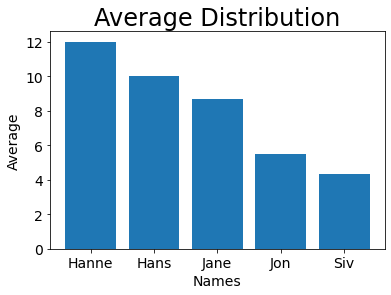

In [34]:
import matplotlib.pyplot as plt 

def get_barChart_average():
    average_list = get_average_grade()
    
    #sorting by average
    average_list.sort(key=lambda x: x[2], reverse=True)

    #creating the barchart
    name_list = ([item[0] for item in average_list])
    av_list = ([item[2] for item in average_list])
   
    plt.figure()
    plt.bar(name_list, av_list, linewidth=5)

    # Set chart title and label axes. 
    plt.title("Average Distribution", fontsize=24)
    plt.xlabel("Names", fontsize=14)
    plt.ylabel("Average", fontsize=14)
    # Set size of tick labels.
    plt.tick_params(axis='both', labelsize=14)
    plt.show()

#get_barChart_average()

Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))

In [35]:
def get_progression_by_ects():
    #getting the list from csv_file
    students = convert_CSV_to_list()   
    count_ects = 0
    percent = 0
    progression_list = []
    tmp_list = []
      
    #sorting by names
    students.sort(key=lambda x: x.name)
    
    names = []
    for student in students:
        names.append(student.name)
    
    #unique values
    names_set = set(names)
    for name in names_set:
        for student in students:
            if(name == student.name):
                grade = int(student.data_sheet.courses.grade)
                if(grade >= 2):
                    count_ects += int(student.data_sheet.courses.ECTS)
                
        percent = (100/150)*count_ects        
        tmp_list = [name,percent]
        progression_list.append(tmp_list)
        count_ects = 0
        percent = 0
    
    return progression_list
get_progression_by_ects()

[['Hanne', 20.0],
 ['Jane', 26.666666666666664],
 ['Jon', 16.666666666666664],
 ['Hans', 3.333333333333333],
 ['Siv', 36.666666666666664]]

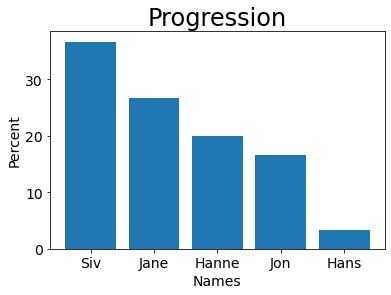

In [37]:
def get_barChart_progression():
    progression = get_progression_by_ects()
    
    #sorting by progression
    progression.sort(key=lambda x: x[1], reverse = True)

    #creating the barchart
    name_list = ([item[0] for item in progression])
    av_list = ([item[1] for item in progression])
   
    plt.figure()
    plt.bar(name_list, av_list, linewidth=5)

    # Set chart title and label axes. 
    plt.title("Progression", fontsize=24)
    plt.xlabel("Names", fontsize=14)
    plt.ylabel("Percent", fontsize=14)
    # Set size of tick labels.
    plt.tick_params(axis='both', labelsize=14)

    plt.show()

get_barChart_progression()